In [23]:

# Import numpy and pandas
import numpy as np
import pandas as pd
# Import operating specific functionality
import os

In [24]:
# Create variable "data" containing the data from the voice.csv file
data = pd.read_csv("voice.csv")

In [25]:
# Show the head of the data, confirming that the data is read and that we have all columns
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [26]:
# Convert the label from text male/female to binary value of 1 or 0
data.label = [1 if each == "male" else 0 for each in  data.label]
# Show head of data to confirm that label value is changed
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [27]:
# Set variable "gender" to be the label column
gender = data.label
# Drop the label column from the data so that we now have features and labels separated
data.drop(["label"], axis = 1, inplace = True)


In [28]:
#Normalize the data to ensure that differing magnitude within features does not create a problem when running the model
data = (data-np.min(data))/(np.max(data)-np.min(data))

# Set variable "features" to be the normalized data
features = data

features.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380


In [29]:
# Import train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split data into training set and testing set with a test size of 30% of the samples.
# The integer 42 is used for shuffling the data
x_train, x_test, y_train, y_test = train_test_split(features, gender, test_size = 0.2, random_state = 42)

In [30]:
# Import K Nearest Neighbors from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Set variable "knn" to be the KNeighborsClassifier using K of 1 from above
knn = KNeighborsClassifier(n_neighbors = K)

In [31]:
# Find the optimal value of K.
# First set variables for saving the best K value, the best youden index and an array with all of 
# the youden scores
K_Optimal = 0
best_youden = 0
youden_scores = []

# Test different K values, saving the optimal one after each test
for K in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    tp = sum((y_test == y_pred) * (y_test == 1) * 1)
    tn = sum((y_test == y_pred) * (y_test == 0) * 1)
    fp = sum((y_test != y_pred) * (y_test == 0) * 1)
    fn = sum((y_test != y_pred) * (y_test == 1) * 1)
    sens = tp / (tp + fn)
    spec = tn / (fp + tn)
    youden = sens - (1 - spec)
    youden_scores.append(youden)
    if best_youden < youden:
        best_youden = youden
        K_Optimal = K
        
# Print the optimal K vallue and it's accuracy
print("The optimal K value is {} with a Youden Index of {}%".format(K_Optimal, best_youden))

/home/jensbackvall/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/jensbackvall/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/jensbackvall/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/jensbackvall/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space b

The optimal K value is 8 with a Youden Index of 0.9683281879127577%


/home/jensbackvall/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [32]:
# Now set K to 8 neighbours
K = 8
# Set variable "knn" to be the KNeighborsClassifier using K of 3 from above
knn = KNeighborsClassifier(n_neighbors = K)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = knn.predict(x_test)

# Import metrics module from scikit-learn
from sklearn import metrics
# Check how often the knn model is correct
accuracy = metrics.accuracy_score(y_test, y_pred)
# Print the result
print("Accuracy of model was: ", accuracy)

# Get values for true positive (true male), true negative (true female),
# false positive (false male) and false negative (false female)
tp = sum((y_test == y_pred) * (y_test == 1) * 1)
print("TP: ", tp)
tn = sum((y_test == y_pred) * (y_test == 0) * 1)
print("TN: ", tn)
fp = sum((y_test != y_pred) * (y_test == 0) * 1)
print("FP: ", fp)
fn = sum((y_test != y_pred) * (y_test == 1) * 1)
print("FN: ", fn)

# Define the sensitivity and specificity
sens = tp / (tp + fn)
spec = tn / (fp + tn)

print("Sensitivity is {}".format(sens))
print("Specificity is {}".format(spec))

# Calculate the Youden Index
youden = sens - (1 - spec)

print("Youden Index is {}".format(youden))


Accuracy of model was:  0.9842271293375394
TP:  332
TN:  292
FP:  5
FN:  5
Sensitivity is 0.9851632047477745
Specificity is 0.9831649831649831
Youden Index is 0.9683281879127577


/home/jensbackvall/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


No handles with labels found to put in legend.


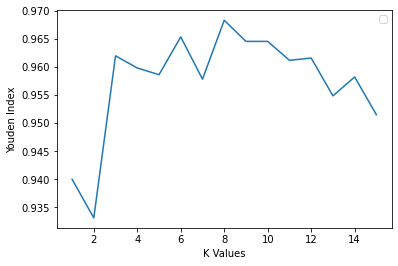

In [33]:
# Generate a plot with the K values and their corresponding Youden Indexes
# Import matplotlib for visualisation
import matplotlib.pyplot as plt
plt.plot(range(1,16), youden_scores)
plt.xlabel("K Values")
plt.ylabel("Youden Index")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

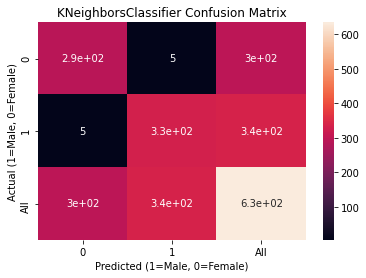

In [34]:
# Set dataset for confusion matrix using the test and prediction data
confusion_data = {'Actual': y_test, 'Predicted': y_pred}

# Define the Pandas dataframe
df = pd.DataFrame(confusion_data, columns=['Actual', 'Predicted'])
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual (1=Male, 0=Female)'], colnames=['Predicted (1=Male, 0=Female)'], margins = True)
plt.title('KNeighborsClassifier Confusion Matrix', loc='center')

# Import Seaborn for visualisation
import seaborn as sn

sn.heatmap(confusion_matrix, annot=True)
plt.show

In [35]:
# Testing testing - Just testing gridsearch optimization for future use
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': np.arange(1, 21)}

knn_gs = GridSearchCV(knn, params_knn, cv=5)

knn_gs.fit(x_train, y_train)

knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_)

{'n_neighbors': 3}
